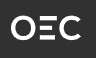

# Downloading International Trade Data
---
### *Dive into OEC's international trade data with this Python notebook, offering a quick guide to kick off your trade analysis.*

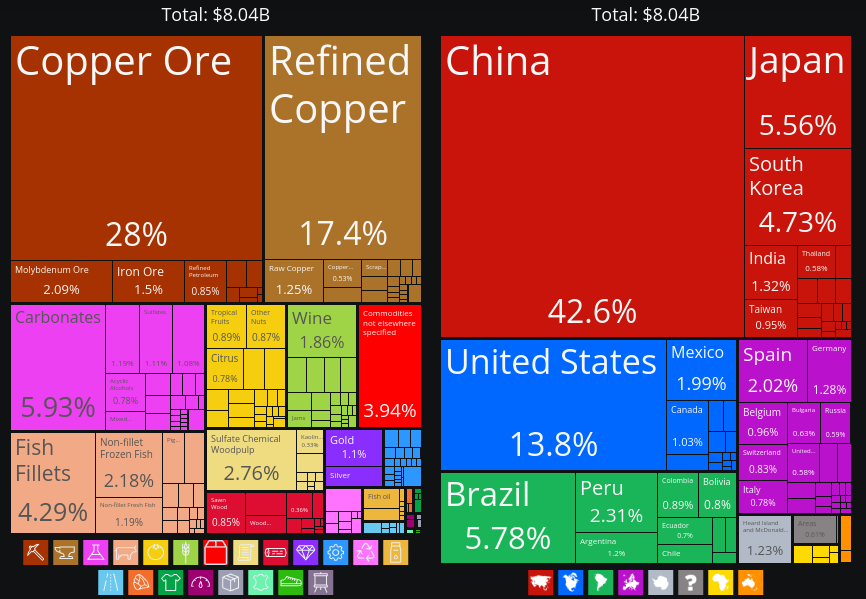

---

## Goal
*The goal of this notebook is to show you how to download international OEC trade data via API, manipulate, visualise, and present statistical insights.*


## Structure
#### 1. The Data Explorer
#### 2. Generate API URLs Using The Data Explorer
#### 3. Download Internatonal Trade Data
#### 4. Trade Data Manipulation
#### 5. Trade Data Statistics
#### 6. Trade Data Visualisation

---

We import the libraries that we will use in the following steps.

In [ ]:
# import libraries
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 1. The Data Explorer
---


### User Interface

The Data Explorer is a great tool to generate queries with filters and sorts through your browser. Once you have logged in, you should click on Data on the upper menu and then on [Data Explorer](https://oec.world/en/explorer) in the drop down menu.

You should a screen with the following features:

1. **Select Dataset:**
  - On the left side of the screen, different Datasets are organized by topics. Begin by selecting a topic of interest. Then, select a specidif data table within that topic.
2. **Search:**
  - Above the dataset selector, a search bar is provided. Start typing to filter the list of datasets and tables.
3. **Data Table:**
  - Results are displayed as a data table in the center of the screen. Each column header allows sorting and filtering.
4. **Add Column:**
  - A click on the "Add Column" button in the upper right corner will show the available columns for that table. Select the columns that you are interested in viewing.
5. **Sorts and Filters:**
  - Rows of the data table can be filtered or sorted by clicking the filter and sort buttons in the top of the column.
6. **Downloading the data:**
  - Data can be downloaded with a click in the bottom right buttons. Options available include CSV, JSON, Parquet, TSV and XLSX.
7. **Copy API:**
  - A click on the bottom right "Copy API" button will send the API endpoint that requests the data directly to the clipboard.
8. **Multilingual:**
  - Language can be selected below the data table.


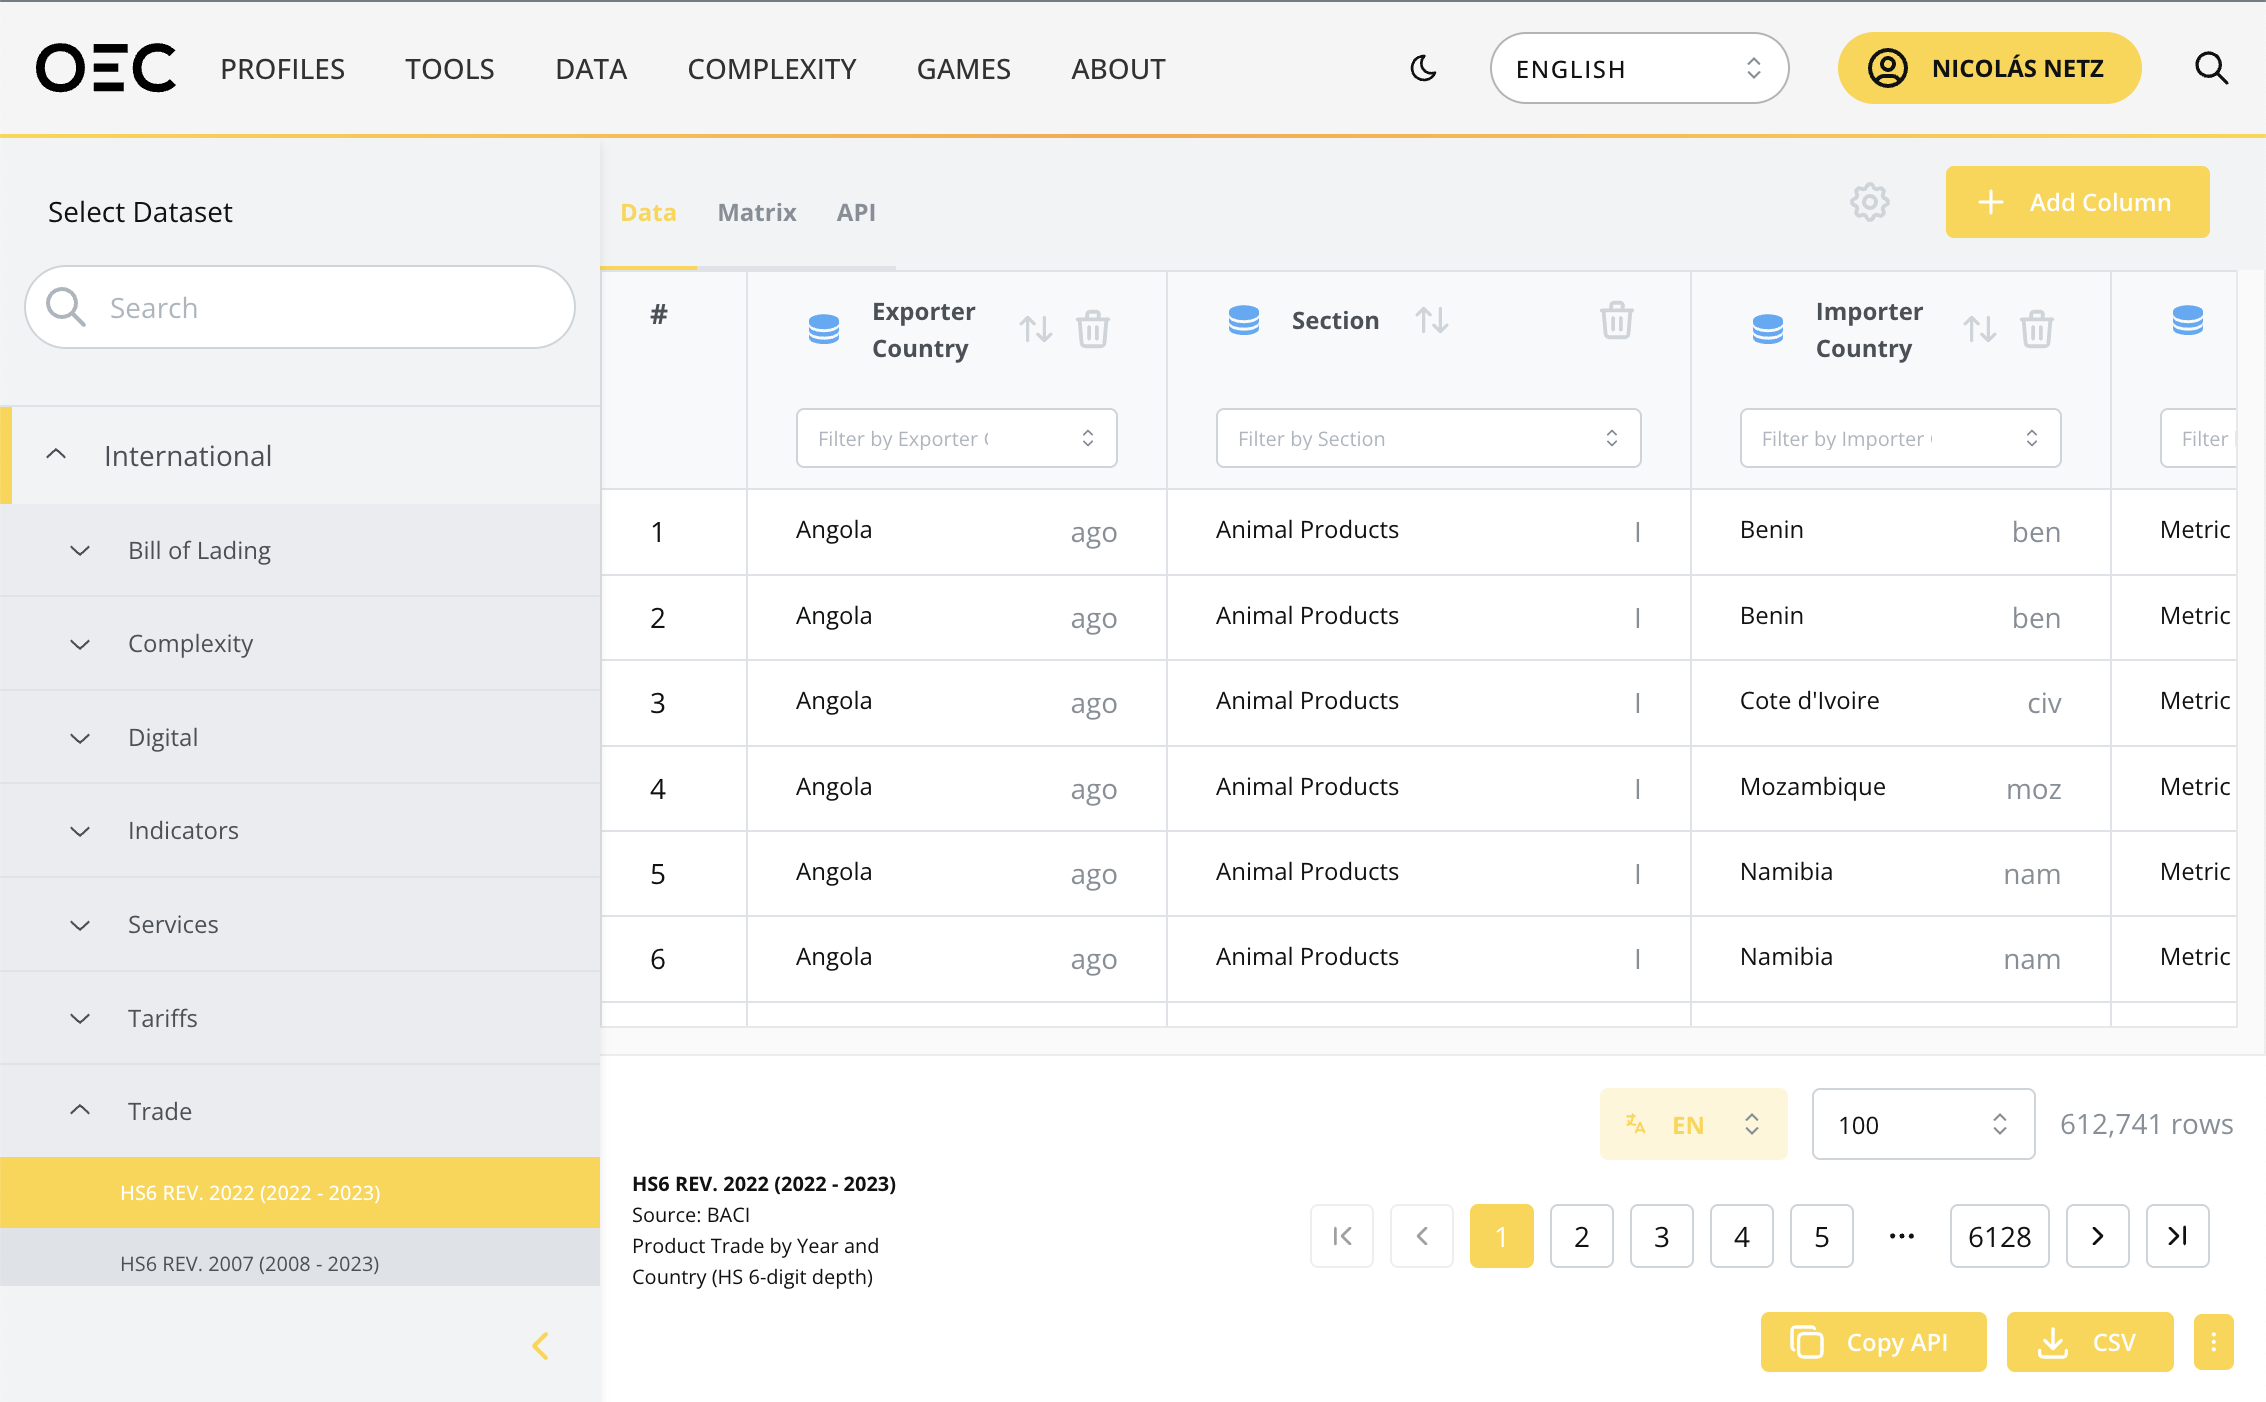

## 2. Generate API URLs Using The Data Explorer
---

## International Export from 2017 to 2020
Let's generate a query of International Exports from 2017 to 2020.

1. **Select Dataset:**
   - On the left drop down menu, select International, then Trade. Select the "HS6 REV. 1992 (1995 - 2023)" dataset. This will automatically load a default view of the data, which can be customized.

2. **Add Column:**
   - Clicking the button will open a menu where queries can be customized.
   - Out of the available columns, choose the following:
      - **Trade Value**
      - **Exporter Country**
      - **HS Product**: Select HS4 (referring to Harmonized System Product Classification at the 4-digit level)
      - **Year**: Select Year and then click on the filter button. Select 2017,2018,2019 and 2020.
3. **Select Dimensions:**
   - From the Drilldown menu, choose the following dimensions:
     - **Exporter:** Select Country.
     - **Product:** At the level of hierarchy we are looking for. In this example, select HS4 (referring to Harmonized System Product Classification at the 4-digit level).
     - **Year:** At the Year level of hierarchy.

4. **Go back to the Data Table:**
   - Click on the Data Table. The query will load automatically.


### Data table
After loading you should see the following results. The results will contain any columns we selected from our previous data selection step.
Now that our Data has been retrieved we can sort and format the results.

1. Clicking the arrow button next to any measure column will sort alphabetically the results.
2. Clicking the trash button will delete the column from the data.
3. Clicking the Filter menu will filter the data.

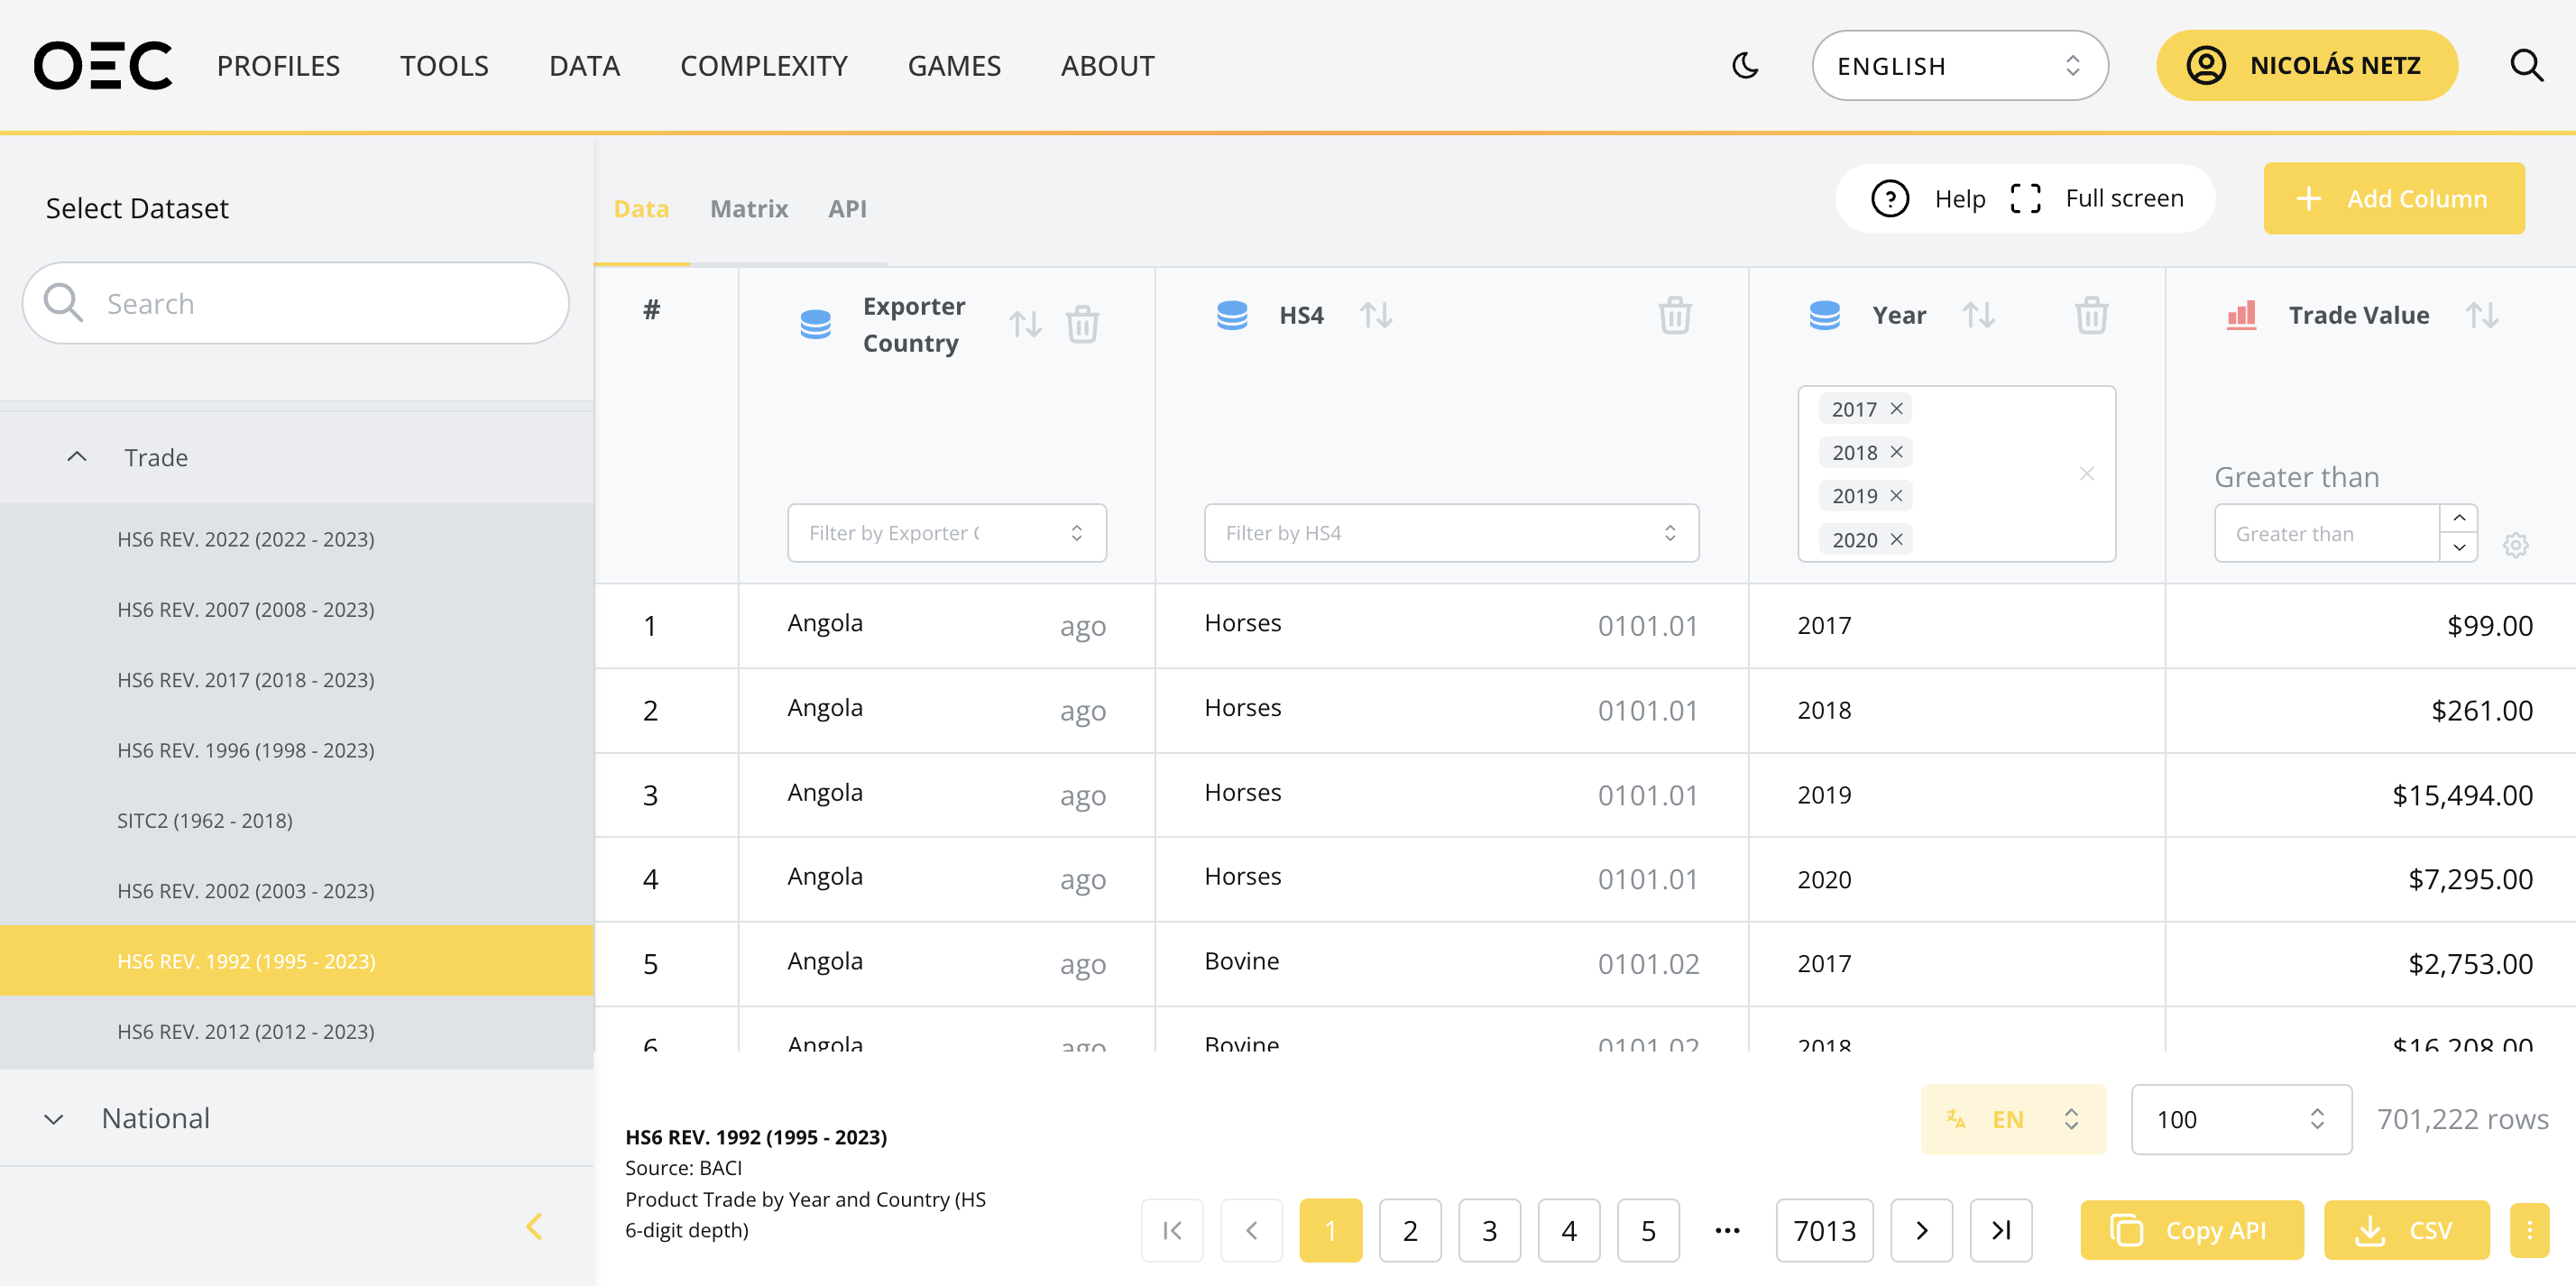

### API ENDPOINT
Finally, once we are satisfied with our data selection, we can click on the 'Copy API' button to add the specific API endpoint URL used to create the data shown in the Data Table. You can also go to the API tab to read the URL, open it in the browser, and copy a cURL command with it.

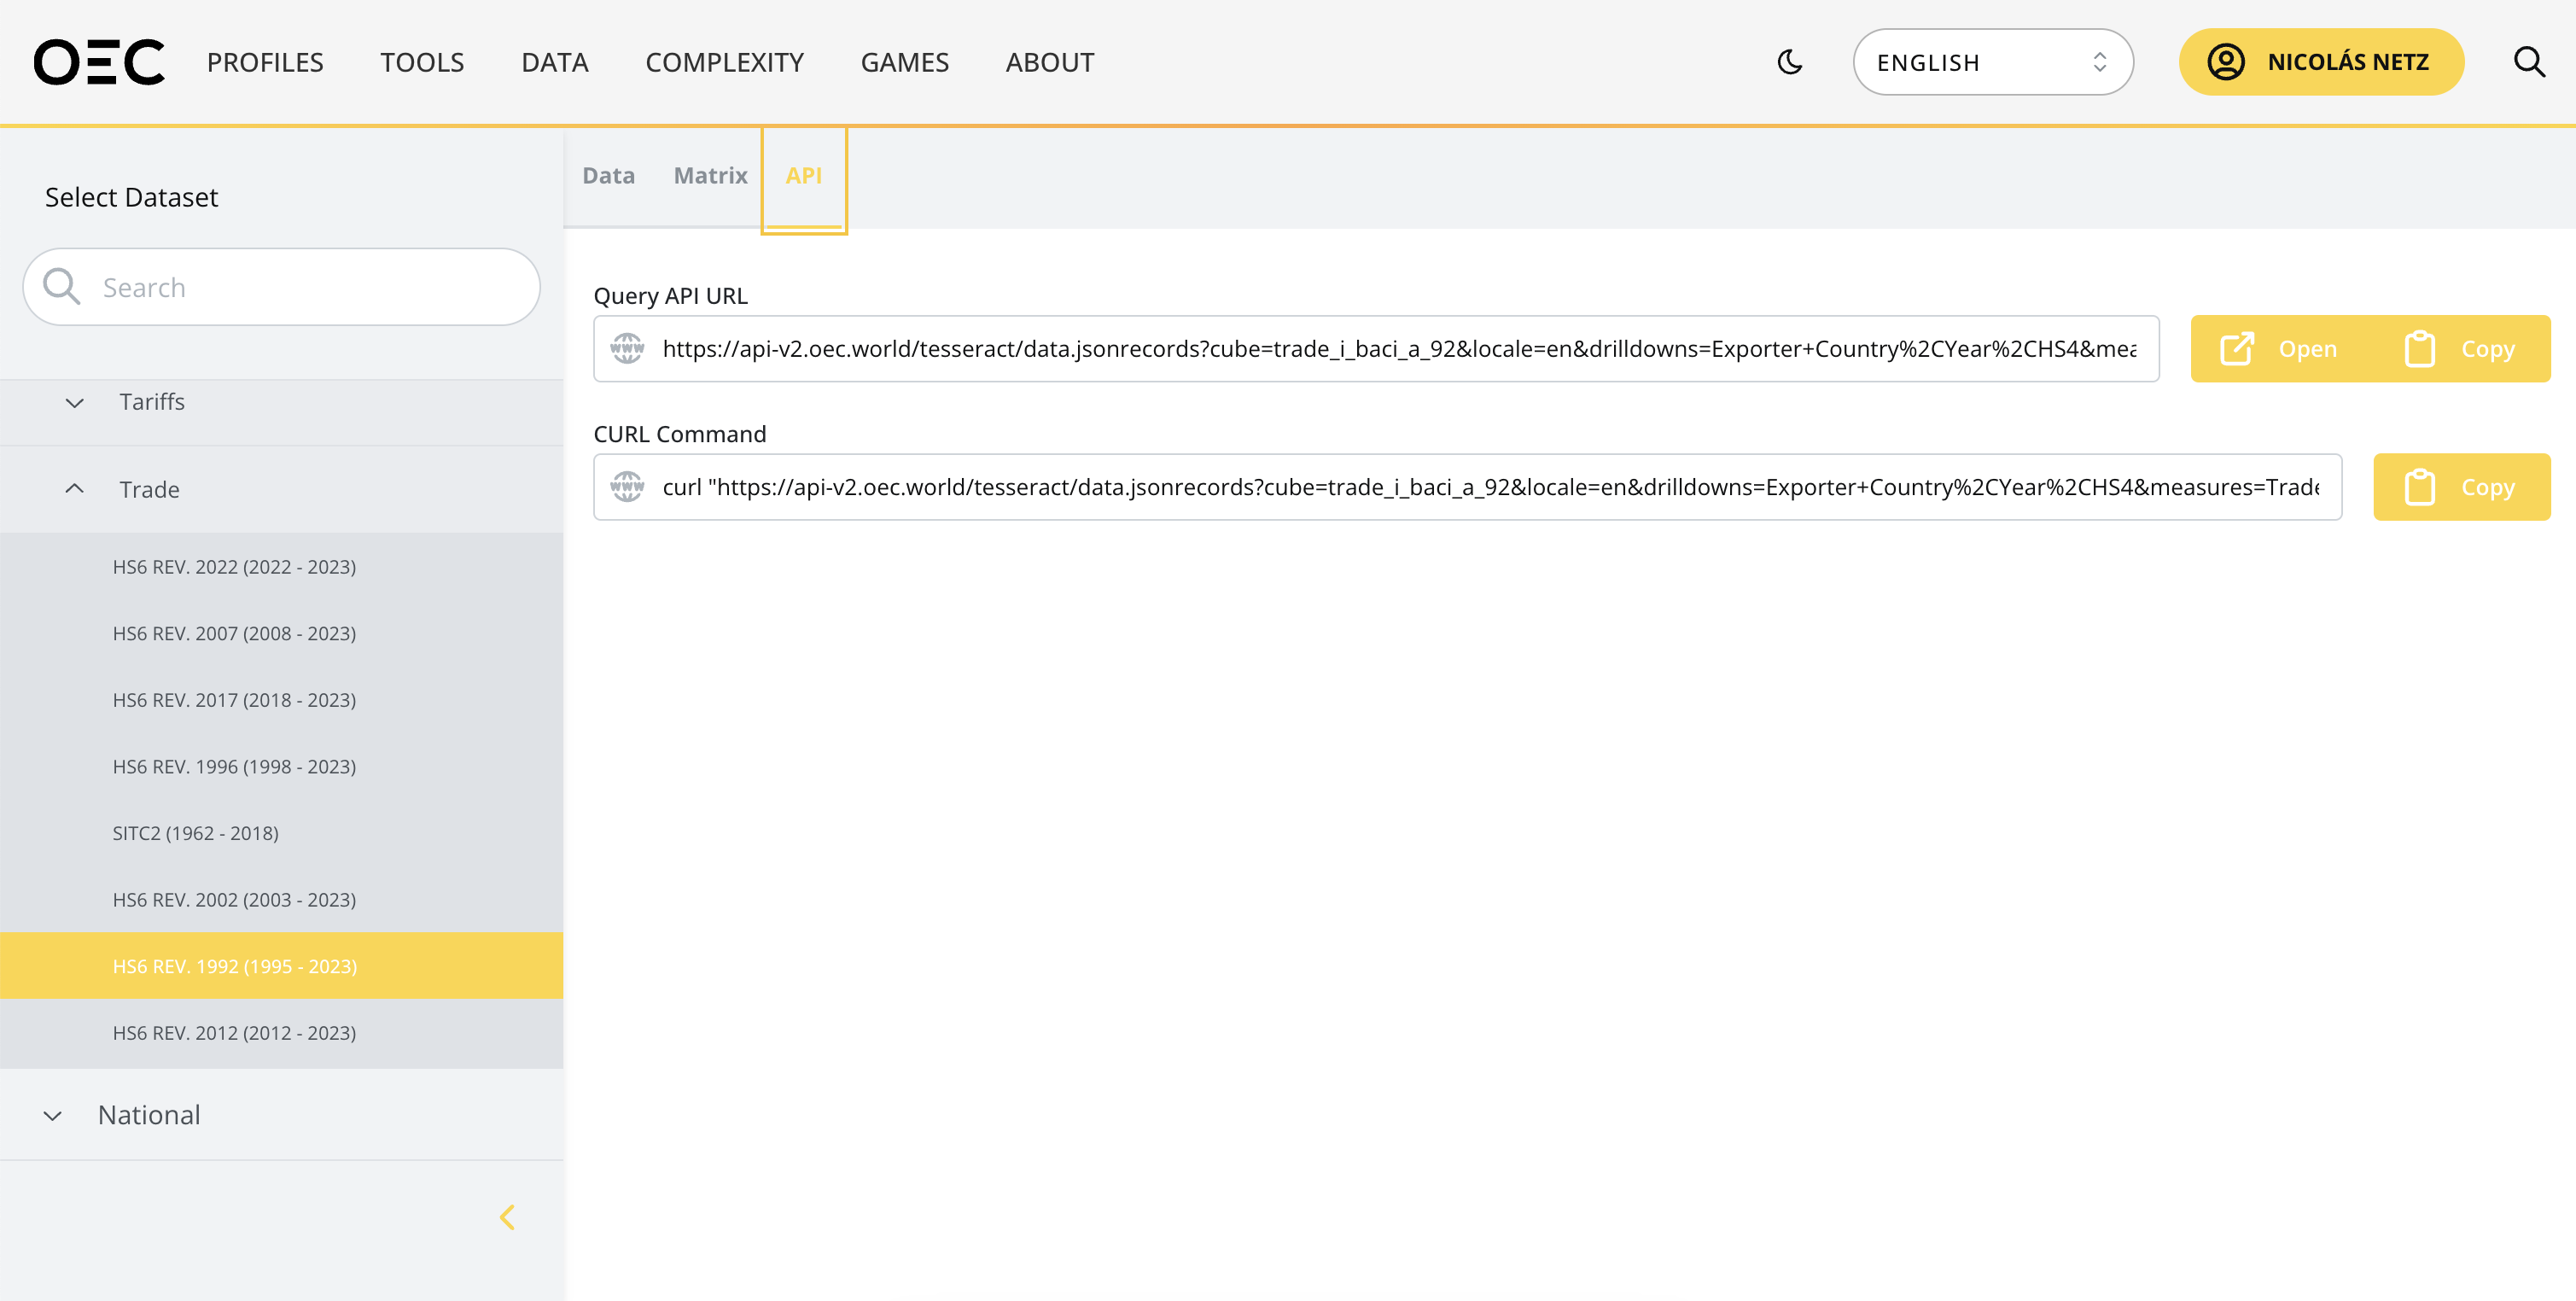

## 3. Download Internatonal Trade Data

---


**Please note:**

You should treat your API token like a password and make sure not to share it with anyone or post it online where others could use it to make requests on your behalf. If at any point, you need to generate a new token, simply go to your user account page and click the button next to your token to generate a new one.

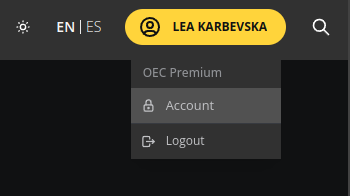

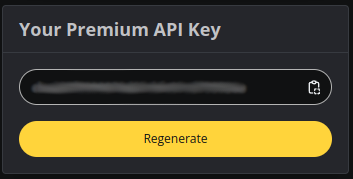

**Important**: Replace the value of 'YOUR_TOKEN' with the API Key of your OEC Account.

In [ ]:
YOUR_TOKEN = 'REPLACE_HERE'

In [ ]:
# download international trade data
r = requests.get("https://api-v2.oec.world/tesseract/data.jsonrecords?cube=trade_i_baci_a_92&locale=en&drilldowns=Exporter+Country%2CYear%2CHS4&measures=Trade+Value&include=Year%3A2017%2C2018%2C2019%2C2020&token="+YOUR_TOKEN)
df = pd.DataFrame(r.json()["data"])

# display data
display(df)

,Exporter Country ID,Exporter Country,HS4 ID,HS4,Year,Trade Value
0,afago,Angola,10101,Horses,2017,99.0
1,afago,Angola,10101,Horses,2018,261.0
2,afago,Angola,10101,Horses,2019,15494.0
3,afago,Angola,10101,Horses,2020,7295.0
4,afago,Angola,10102,Bovine,2017,2753.0
...,...,...,...,...,...,...
701217,saven,Venezuela,219705,Collector's Items,2018,421334.0
701218,saven,Venezuela,219705,Collector's Items,2019,511390.0
701219,saven,Venezuela,219705,Collector's Items,2020,60026.0
701220,saven,Venezuela,219706,Antiques,2017,10007.0


## 4. Trade Data Manipulation
---

### In the following part we will create four dataframes from the international data.

#### 1. Dataframe that contains the total export of each product in every country.
  - Group by Country-Product
  - Sum up the Trade Value


In [ ]:
# group and sum over
df_grouped_country_product = df[['Exporter Country','HS4','Trade Value']].groupby(['Exporter Country','HS4']).sum()

# display data
display(df_grouped_country_product)

Trade Value
Exporter Country HS4                                                            
Afghanistan      Abrasive Powder                                          2811.0
                 Acrylic Polymers                                        23010.0
                 Activated Carbon                                          480.0
                 Acyclic alcohol derivatives (halogenated, sulph...          1.0
                 Agglomerated Cork                                         101.0
...                                                                          ...
Zimbabwe         Yeast                                                  461092.0
                 Zinc Bars                                                  39.0
                 Zinc Powder                                             29181.0
                 Zinc Sheets                                                87.0
                 Zippers                                                 10618.0

[208086 rows x 1 columns]

#### 2. Dataframe that contains the total export of the countries.
  - Group by Country
  - Sum up the Trade Value

In [ ]:
# group and sum over
df_grouped_country = df[['Exporter Country','Trade Value']].groupby('Exporter Country').sum()

# display data
display(df_grouped_country)

,Trade Value
Exporter Country,
Afghanistan,6.926492e+09
Albania,1.078111e+10
Algeria,1.399000e+11
American Samoa,1.593561e+08
Andorra,6.816775e+08
...,...
Vietnam,1.191076e+12
Wallis and Futuna,5.237896e+06
Yemen,7.258022e+09


#### 3. Dataframe that contains the total export of each product.
  - Group by Product
  - Sum up the Trade Value

In [ ]:
# group data and sum overOnce you have logged in, you should see the following screen.
df_grouped_product = df[['HS4','Trade Value']].groupby('HS4').sum()

# display data
display(df_grouped_product)

,Trade Value
HS4,
Abrasive Powder,1.780489e+10
Accordions,2.615000e+03
Acetals and Hemiacetals,3.225970e+08
Acrylic Polymers,6.542432e+10
Activated Carbon,1.089562e+10
...,...
Zinc Pipes,3.659100e+04
Zinc Powder,2.165797e+09
Zinc Sheets,2.741563e+09


#### 4. Dataframe that contains the exports of the top 5 biggest exporters in 2017, 2018, 2019 and 2020.
  - Group by Country and select the 5 largest country exporters
  - Select only the top 5 exporters from the initial data.

In [ ]:
# group data and find 5 largest exporters
top_n_countries = df.groupby('Exporter Country')['Trade Value'].sum().nlargest(5).index

# select the 5 largest exporters
df_top_n = df[df['Exporter Country'].isin(top_n_countries)]

# display data
display(df_top_n)

,Exporter Country ID,Exporter Country,HS4 ID,HS4,Year,Trade Value
177556,aschn,China,10101,Horses,2017,1796507.0
177557,aschn,China,10101,Horses,2018,116726969.0
177558,aschn,China,10101,Horses,2019,542941980.0
177559,aschn,China,10101,Horses,2020,572288023.0
177560,aschn,China,10102,Bovine,2017,59282100.0
...,...,...,...,...,...,...
615844,nausa,United States,219705,Collector's Items,2020,516859354.0
615845,nausa,United States,219706,Antiques,2017,405370032.0
615846,nausa,United States,219706,Antiques,2018,383538679.0
615847,nausa,United States,219706,Antiques,2019,459196743.0


## 5. Data Statistics
---

In this section, we utilize the *describe()* function from the pandas library to present summary statistics, including count, mean, and percentiles, offering insights into the key characteristics of the dataset.

In [ ]:
# statistics of country-product data
print('Statistics for country-product data: ')
display(df_grouped_country_product.describe())

# statistics of country data
print('\nStatistics for country data: ')
display(df_grouped_country.describe())

# statistics of product data
print('\nStatistics for product data: ')
display(df_grouped_product.describe())

Statistics for country-product data: 


,Trade Value
count,2.080860e+05
mean,3.473920e+08
std,5.513056e+09
min,1.000000e+00
25%,1.768725e+04
50%,4.312415e+05
75%,1.374993e+07
max,9.781064e+11



Statistics for country data: 


,Trade Value
count,2.260000e+02
mean,3.198558e+11
std,9.879002e+11
min,5.237896e+06
25%,2.118604e+09
50%,2.373302e+10
75%,1.597191e+11
max,1.068182e+13



Statistics for product data: 


,Trade Value
count,1.239000e+03
mean,5.834334e+10
std,2.148762e+11
min,3.000000e+01
25%,3.741136e+09
50%,1.248779e+10
75%,4.199639e+10
max,3.850756e+12


## 6. Data Visualisation
---
Here, we visualize the distributions of the four created dataframes from section 5.

#### 1. Exporter Countries-Products data

In [ ]:
df_grouped_country_product

Trade Value
Exporter Country HS4                                                            
Afghanistan      Abrasive Powder                                          2811.0
                 Acrylic Polymers                                        23010.0
                 Activated Carbon                                          480.0
                 Acyclic alcohol derivatives (halogenated, sulph...          1.0
                 Agglomerated Cork                                         101.0
...                                                                          ...
Zimbabwe         Yeast                                                  461092.0
                 Zinc Bars                                                  39.0
                 Zinc Powder                                             29181.0
                 Zinc Sheets                                                87.0
                 Zippers                                                 10618.0

[208086 rows x 1 columns]

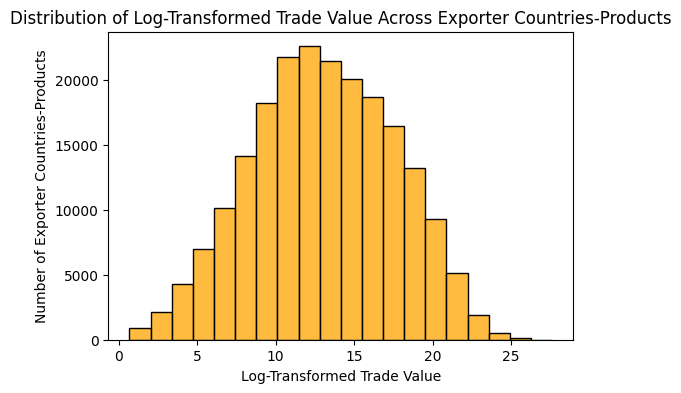

In [ ]:
# create figure
plt.figure(figsize=(6, 4))

# plot
sns.histplot(np.log1p(df_grouped_country_product['Trade Value']), bins=20, kde=False, color='orange')

# add labels
plt.title('Distribution of Log-Transformed Trade Value Across Exporter Countries-Products')
plt.xlabel('Log-Transformed Trade Value')
plt.ylabel('Number of Exporter Countries-Products')

# display
plt.show()

#### 2. Countries data

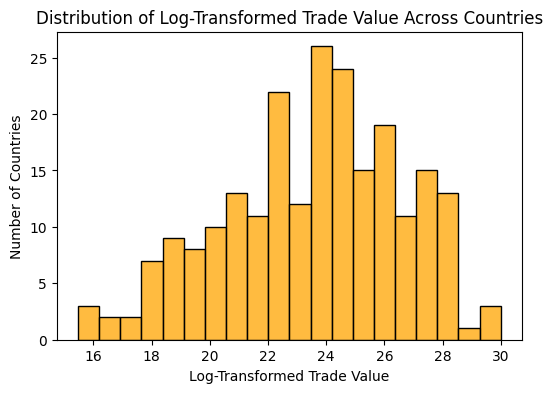

In [ ]:
# create figure
plt.figure(figsize=(6, 4))

# plot
sns.histplot(np.log1p(df_grouped_country['Trade Value']), bins=20, kde=False, color='orange')

# add labels
plt.title('Distribution of Log-Transformed Trade Value Across Countries')
plt.xlabel('Log-Transformed Trade Value')
plt.ylabel('Number of Countries')

# display
plt.show()

#### 3. Products data

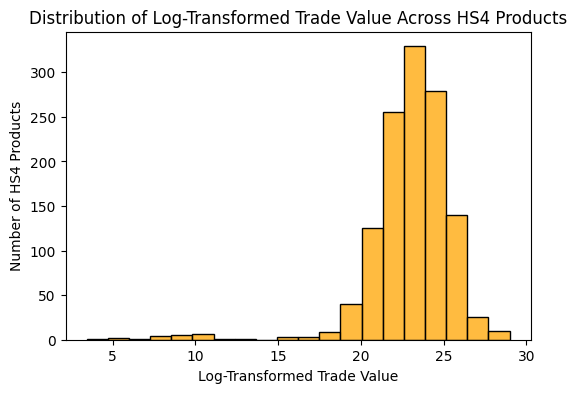

In [ ]:
# create figure
plt.figure(figsize=(6, 4))

# plot
sns.histplot(np.log1p(df_grouped_product['Trade Value']), bins=20, kde=False, color='orange')

# add labels
plt.title('Distribution of Log-Transformed Trade Value Across HS4 Products')
plt.xlabel('Log-Transformed Trade Value')
plt.ylabel('Number of HS4 Products')

# display
plt.show()

#### 4. Top 5 exporters trade data

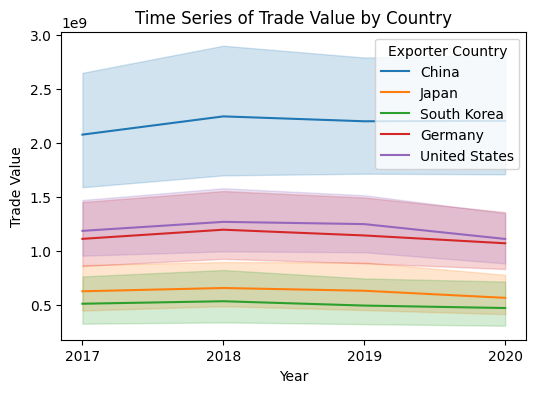

In [ ]:
# create figure
plt.figure(figsize=(6, 4))

# plot
sns.lineplot(x='Year', y='Trade Value', hue='Exporter Country', data=df_top_n)

# add labels
plt.title('Time Series of Trade Value by Country')
plt.xlabel('Year')
plt.ylabel('Trade Value')
plt.xticks(df_top_n['Year'].unique().astype(int))

# display
plt.show()

### Congratulations on downloading and analyzing a segment of our international trade data. Happy exploring and may your analyses yield valuable insights!
### For additional notebook demos and comprehensive documentation, visit the [OEC](https://oec.world/en/resources/documentation) website.
---